# 1D time series analysis

https://www.geeksforgeeks.org/time-series-analysis-and-forecasting

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 

## Components of Time Series Data

https://www.geeksforgeeks.org/components-of-time-series-data/

### Trends

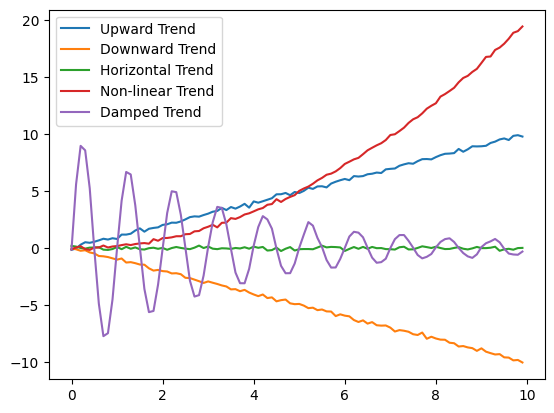

In [2]:
# Upward Trend 
t = np.arange(0, 10, 0.1) 
data = t + np.random.normal(0, 0.1, len(t)) 
plt.plot(t, data, label='Upward Trend') 
  
# Downward Trend 
t = np.arange(0, 10, 0.1) 
data = -t + np.random.normal(0, 0.1, len(t)) 
plt.plot(t, data, label='Downward Trend') 
  
# Horizontal Trend 
t = np.arange(0, 10, 0.1) 
data = np.zeros(len(t)) + np.random.normal(0, 0.1, len(t)) 
plt.plot(t, data, label='Horizontal Trend') 
  
# Non-linear Trend 
t = np.arange(0, 10, 0.1) 
data = t**2 / 5 + np.random.normal(0, 0.1, len(t)) 
plt.plot(t, data, label='Non-linear Trend') 
  
# Damped Trend 
t = np.arange(0, 10, 0.1) 
data = 10 * np.exp(-0.3*t) * np.sin(2*np.pi*t)\
        + np.random.normal(0, 0.1, len(t)) 
plt.plot(t, data, label='Damped Trend') 
  
plt.legend() 
plt.show() 

### Seasonality and Cyclicity

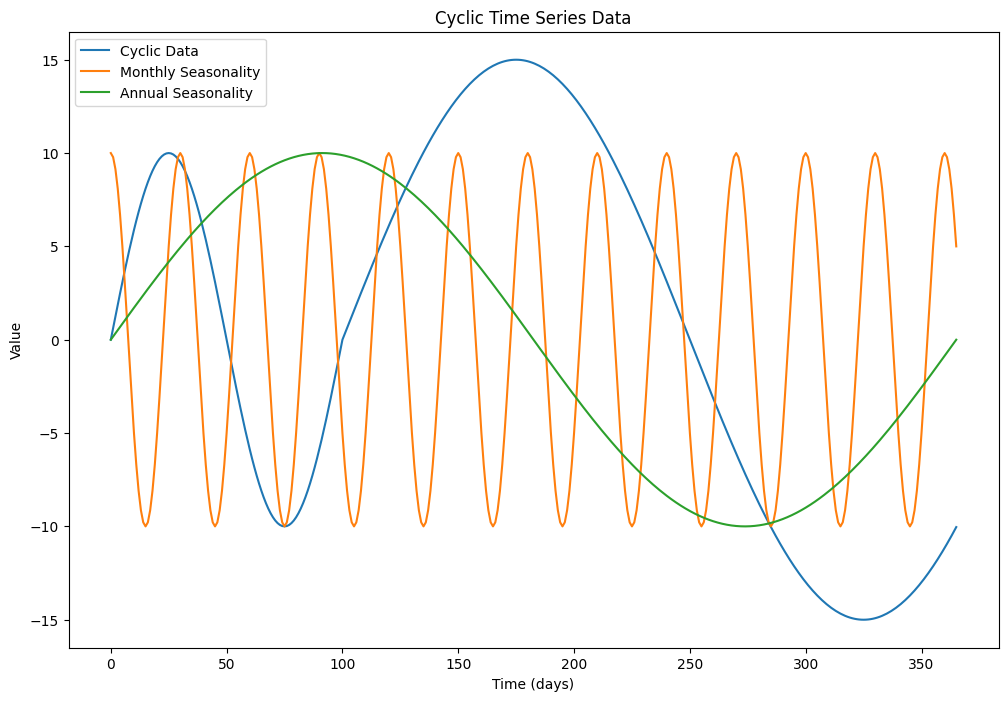

In [3]:
# Generate sample data with cyclic patterns 
np.random.seed(1) 
time = np.arange(0, 366) 
data = np.concatenate([10 * np.sin(2 * np.pi * time[:100] / 100),
                       15 * np.sin(2 * np.pi * (time[100:]-100) / 300)])

# monthly seasonality 
monthly_seasonality = np.cos(2 * np.pi * time / 30) 
monthly_data = 10 * monthly_seasonality 
  
# annual seasonality 
annual_seasonality = np.sin(2 * np.pi * time / 365) 
annual_data = 10 * annual_seasonality 
  
# Plot the data 
plt.figure(figsize=(12, 8)) 
plt.plot(time, data, label='Cyclic Data')

plt.plot(time, monthly_data, 
         label='Monthly Seasonality') 
plt.plot(time, annual_data, 
         label='Annual Seasonality') 
plt.legend(loc='upper left') 

plt.legend(loc='upper left') 
plt.xlabel('Time (days)') 
plt.ylabel('Value') 
plt.title('Cyclic Time Series Data') 
plt.show() 

### Irregularities (noise)

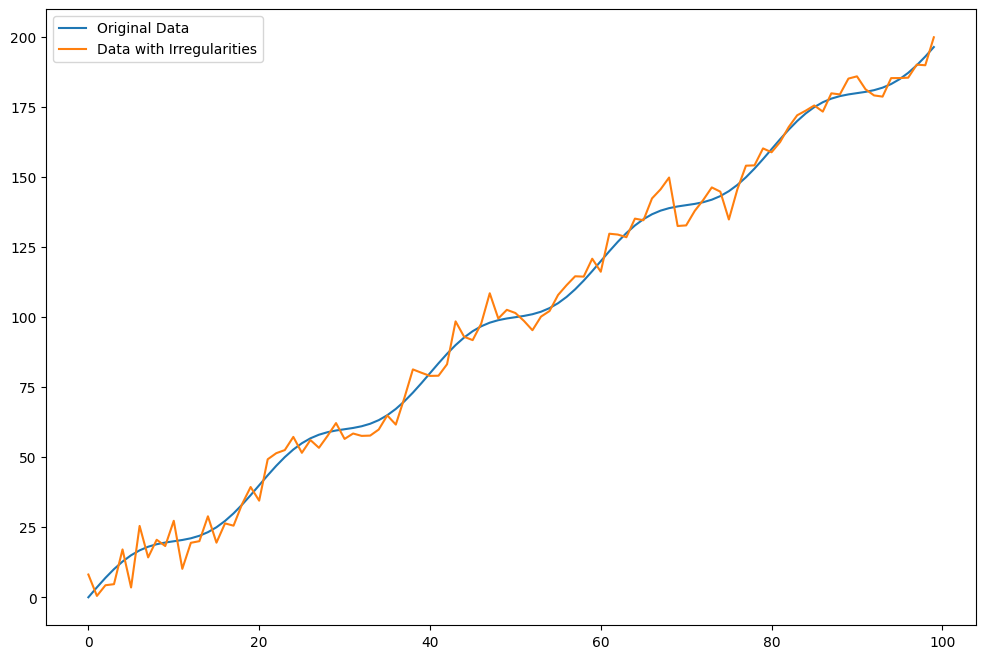

In [4]:
# Generate sample time series data 
np.random.seed(1) 
time = np.arange(0, 100) 
data = 5 * np.sin(2 * np.pi * time / 20) + 2 * time 
  
# Introduce irregularities by adding random noise 
irregularities = np.random.normal(0, 5, len(data)) 
irregular_data = data + irregularities 
  
# Plot the original data and the data with irregularities 
plt.figure(figsize=(12, 8)) 
plt.plot(time, data, label='Original Data') 
plt.plot(time, irregular_data, 
         label='Data with Irregularities') 
plt.legend(loc='upper left') 
plt.show() 

## Autocorrelation

https://machinelearningmastery.com/gentle-introduction-autocorrelation-partial-autocorrelation/

https://www.geeksforgeeks.org/autocorrelation/

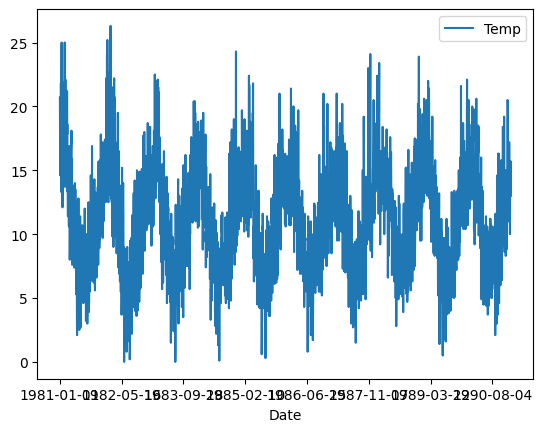

In [5]:
series = pd.read_csv('daily-min-temperatures.csv', header=0, index_col=0)
series.plot()
plt.show()

In [6]:
from statsmodels.graphics.tsaplots import plot_acf

In [7]:
# ?plot_acf

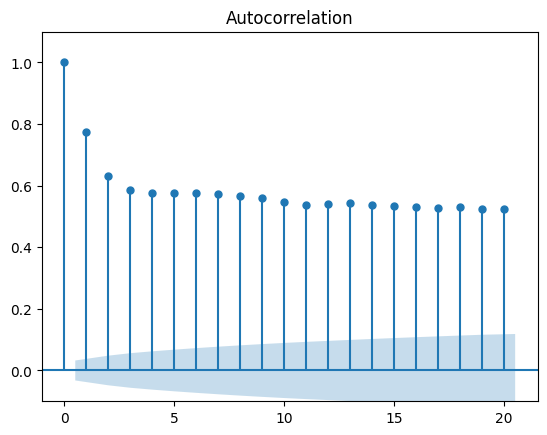

In [8]:
plot_acf(series, lags = 20, alpha=0.05)
plt.ylim(-0.1, 1.1)
plt.show()

In [9]:
from statsmodels.graphics.tsaplots import plot_pacf

The partial autocorrelation at lag k is the correlation that results after removing the effect of any correlations due to the terms at shorter lags.

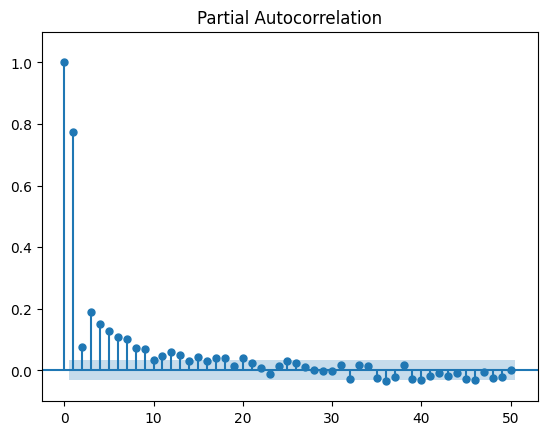

In [10]:
plot_pacf(series, lags = 50, alpha=0.05)
plt.ylim(-0.1, 1.1)
plt.show()

In [11]:
# series.diff().diff().plot()

In [12]:
from statsmodels.stats.stattools import durbin_watson
from statsmodels.regression.linear_model import OLS

Interpretation of DW Statistics:
- If the value of DW statistic is 2.0, it suggests that there is no autocorrelation detected in the sample.
- If the value is less than 2, it suggests that there is a positive autocorrelation.
- If the value is between 2 and 4, it suggests that there is a negative autocorrelation.

Decision Rule
- If the Durbin-Watson test statistic is significantly different from 2, it suggests the presence of autocorrelation.
- The decision to reject the null hypothesis depends on the critical values provided in statistical tables for different significance levels.

In [13]:
X =np.arange(len(series))
Y = np.asarray(series[['Temp']])

# Fit the ordinary least square method.
ols_res = OLS(Y,X).fit()
# apply durbin watson statistic on the ols residual
durbin_watson(ols_res.resid)

0.15751955044652058

In [14]:
series2 = series.diff()[1:]

X2 =np.arange(len(series2))
Y2 = np.asarray(series2[['Temp']])

# Fit the ordinary least square method.
ols_res = OLS(Y2,X2).fit()
# apply durbin watson statistic on the ols residual
durbin_watson(ols_res.resid)

2.3612551894637694

## Outliers

## SARIMA

https://medium.com/@tirthamutha/time-series-forecasting-using-sarima-in-python-8b75cd3366f2

https://www.geeksforgeeks.org/sarima-seasonal-autoregressive-integrated-moving-average/

https://towardsdatascience.com/time-series-forecasting-with-arima-sarima-and-sarimax-ee61099e78f6

In [15]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.seasonal import seasonal_decompose

In [71]:
series = pd.read_csv('daily-min-temperatures.csv', header=0, index_col=0, parse_dates=True)

In [72]:
series_m = series['Temp'].resample('ME').mean().dropna()

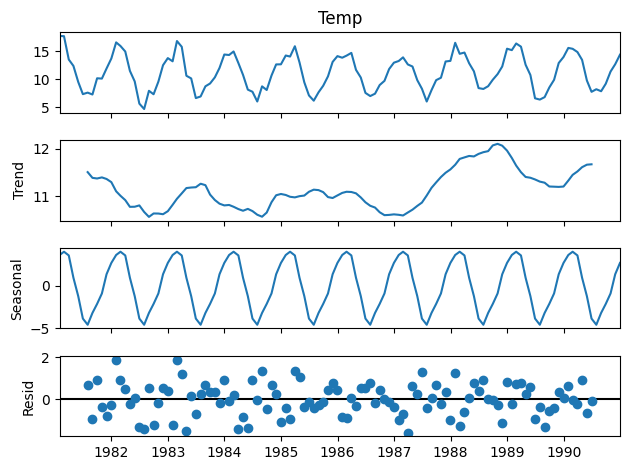

In [73]:
decomposition=seasonal_decompose(series_m,model='additive',period=12)
decomposition.plot()
plt.show()

In [74]:
dftest = adfuller(series_m, autolag = 'AIC', maxlag=13)
print("1. ADF : ",dftest[0])
print("2. P-Value : ", dftest[1])
print("3. Num Of Lags : ", dftest[2])
print("4. Num Of Observations Used For ADF Regression and Critical Values Calculation :", dftest[3])
print("5. Critical Values :")
for key, val in dftest[4].items():
    print("\t",key, ": ", val)

1. ADF :  -1.8923126029292998
2. P-Value :  0.33568610206497607
3. Num Of Lags :  13
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 106
5. Critical Values :
	 1% :  -3.4936021509366793
	 5% :  -2.8892174239808703
	 10% :  -2.58153320754717


In [80]:
data_diff=series_m.diff(periods=12).dropna()

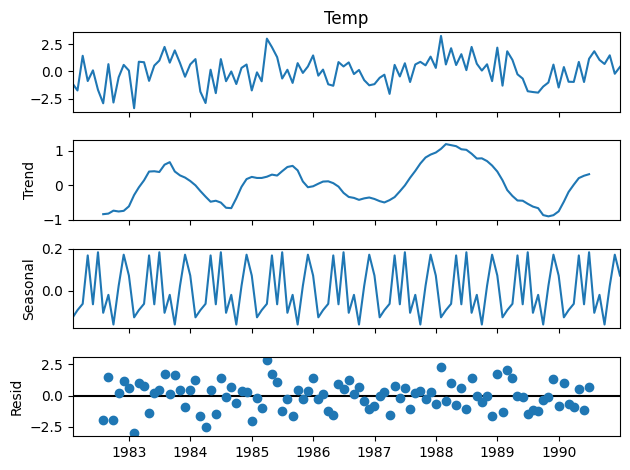

In [81]:
decomposition=seasonal_decompose(data_diff, model='additive',period=12)
decomposition.plot()
plt.show()

In [82]:
dftest = adfuller(data_diff, autolag = 'AIC', maxlag=13)
print("1. ADF : ",dftest[0])
print("2. P-Value : ", dftest[1])
print("3. Num Of Lags : ", dftest[2])
print("4. Num Of Observations Used For ADF Regression and Critical Values Calculation :", dftest[3])
print("5. Critical Values :")
for key, val in dftest[4].items():
    print("\t",key, ": ", val)

1. ADF :  -4.755859518133532
2. P-Value :  6.600750942977017e-05
3. Num Of Lags :  11
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 96
5. Critical Values :
	 1% :  -3.5003788874873405
	 5% :  -2.8921519665075235
	 10% :  -2.5830997960069446


In [83]:
import pmdarima as pmd

In [84]:
# ?pmd.auto_arima

In [89]:
series_m_train = series_m[:96]
series_m_test = series_m[96:]

In [90]:
model=pmd.auto_arima(series_m_train,start_p=1, max_p=3, start_q=1, max_q=3,
                     m=12,seasonal=True,stepwise=True, trace=True)

/home/mdob/playground/ADDITIONAL/Various-tools-and-notes/vs_scripts3.12/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/mdob/playground/ADDITIONAL/Various-tools-and-notes/vs_scripts3.12/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/mdob/playground/ADDITIONAL/Various-tools-and-notes/vs_scripts3.12/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/mdob/playground/ADDITIONAL/Various-tools-and-notes/vs_scripts3.12/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed i

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(1,0,1)[12] intercept   : AIC=327.078, Time=0.53 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=493.108, Time=0.01 sec


/home/mdob/playground/ADDITIONAL/Various-tools-and-notes/vs_scripts3.12/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/mdob/playground/ADDITIONAL/Various-tools-and-notes/vs_scripts3.12/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=345.065, Time=0.31 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=393.166, Time=0.06 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=744.195, Time=0.01 sec
 ARIMA(1,0,1)(0,0,1)[12] intercept   : AIC=373.287, Time=0.09 sec


/home/mdob/playground/ADDITIONAL/Various-tools-and-notes/vs_scripts3.12/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/mdob/playground/ADDITIONAL/Various-tools-and-notes/vs_scripts3.12/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/mdob/playground/ADDITIONAL/Various-tools-and-notes/vs_scripts3.12/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/mdob/playground/ADDITIONAL/Various-tools-and-notes/vs_scripts3.12/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed i

 ARIMA(1,0,1)(1,0,0)[12] intercept   : AIC=344.099, Time=0.28 sec


/home/mdob/playground/ADDITIONAL/Various-tools-and-notes/vs_scripts3.12/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,1)(2,0,1)[12] intercept   : AIC=329.221, Time=0.73 sec


/home/mdob/playground/ADDITIONAL/Various-tools-and-notes/vs_scripts3.12/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,1)(1,0,2)[12] intercept   : AIC=inf, Time=0.80 sec
 ARIMA(1,0,1)(0,0,0)[12] intercept   : AIC=393.771, Time=0.04 sec


/home/mdob/playground/ADDITIONAL/Various-tools-and-notes/vs_scripts3.12/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/mdob/playground/ADDITIONAL/Various-tools-and-notes/vs_scripts3.12/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,1)(0,0,2)[12] intercept   : AIC=372.898, Time=0.33 sec


/home/mdob/playground/ADDITIONAL/Various-tools-and-notes/vs_scripts3.12/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,1)(2,0,0)[12] intercept   : AIC=333.815, Time=0.73 sec


/home/mdob/playground/ADDITIONAL/Various-tools-and-notes/vs_scripts3.12/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,1)(2,0,2)[12] intercept   : AIC=inf, Time=0.95 sec


/home/mdob/playground/ADDITIONAL/Various-tools-and-notes/vs_scripts3.12/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,1)(1,0,1)[12] intercept   : AIC=332.673, Time=0.35 sec


/home/mdob/playground/ADDITIONAL/Various-tools-and-notes/vs_scripts3.12/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,0)(1,0,1)[12] intercept   : AIC=327.145, Time=0.30 sec


/home/mdob/playground/ADDITIONAL/Various-tools-and-notes/vs_scripts3.12/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,0,1)(1,0,1)[12] intercept   : AIC=340.441, Time=0.37 sec


/home/mdob/playground/ADDITIONAL/Various-tools-and-notes/vs_scripts3.12/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,2)(1,0,1)[12] intercept   : AIC=326.529, Time=0.46 sec
 ARIMA(1,0,2)(0,0,1)[12] intercept   : AIC=364.498, Time=0.11 sec


/home/mdob/playground/ADDITIONAL/Various-tools-and-notes/vs_scripts3.12/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/mdob/playground/ADDITIONAL/Various-tools-and-notes/vs_scripts3.12/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,2)(1,0,0)[12] intercept   : AIC=348.184, Time=0.38 sec


/home/mdob/playground/ADDITIONAL/Various-tools-and-notes/vs_scripts3.12/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,2)(2,0,1)[12] intercept   : AIC=328.903, Time=0.94 sec


/home/mdob/playground/ADDITIONAL/Various-tools-and-notes/vs_scripts3.12/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,2)(1,0,2)[12] intercept   : AIC=328.678, Time=4.82 sec
 ARIMA(1,0,2)(0,0,0)[12] intercept   : AIC=382.677, Time=0.08 sec


/home/mdob/playground/ADDITIONAL/Various-tools-and-notes/vs_scripts3.12/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/mdob/playground/ADDITIONAL/Various-tools-and-notes/vs_scripts3.12/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,2)(0,0,2)[12] intercept   : AIC=363.050, Time=0.47 sec


/home/mdob/playground/ADDITIONAL/Various-tools-and-notes/vs_scripts3.12/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,2)(2,0,0)[12] intercept   : AIC=332.267, Time=0.68 sec


/home/mdob/playground/ADDITIONAL/Various-tools-and-notes/vs_scripts3.12/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,2)(2,0,2)[12] intercept   : AIC=inf, Time=1.29 sec


/home/mdob/playground/ADDITIONAL/Various-tools-and-notes/vs_scripts3.12/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,2)(1,0,1)[12] intercept   : AIC=331.266, Time=0.44 sec


/home/mdob/playground/ADDITIONAL/Various-tools-and-notes/vs_scripts3.12/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,0,2)(1,0,1)[12] intercept   : AIC=508.395, Time=0.48 sec


/home/mdob/playground/ADDITIONAL/Various-tools-and-notes/vs_scripts3.12/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,3)(1,0,1)[12] intercept   : AIC=inf, Time=0.46 sec


/home/mdob/playground/ADDITIONAL/Various-tools-and-notes/vs_scripts3.12/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,3)(1,0,1)[12] intercept   : AIC=328.351, Time=0.47 sec


/home/mdob/playground/ADDITIONAL/Various-tools-and-notes/vs_scripts3.12/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,0,3)(1,0,1)[12] intercept   : AIC=inf, Time=0.67 sec


/home/mdob/playground/ADDITIONAL/Various-tools-and-notes/vs_scripts3.12/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,2)(1,0,1)[12]             : AIC=336.397, Time=0.25 sec

Best model:  ARIMA(1,0,2)(1,0,1)[12] intercept
Total fit time: 17.956 seconds


In [91]:
model

ARIMA(order=(1, 0, 2), scoring_args={}, seasonal_order=(1, 0, 1, 12),
      suppress_warnings=True)

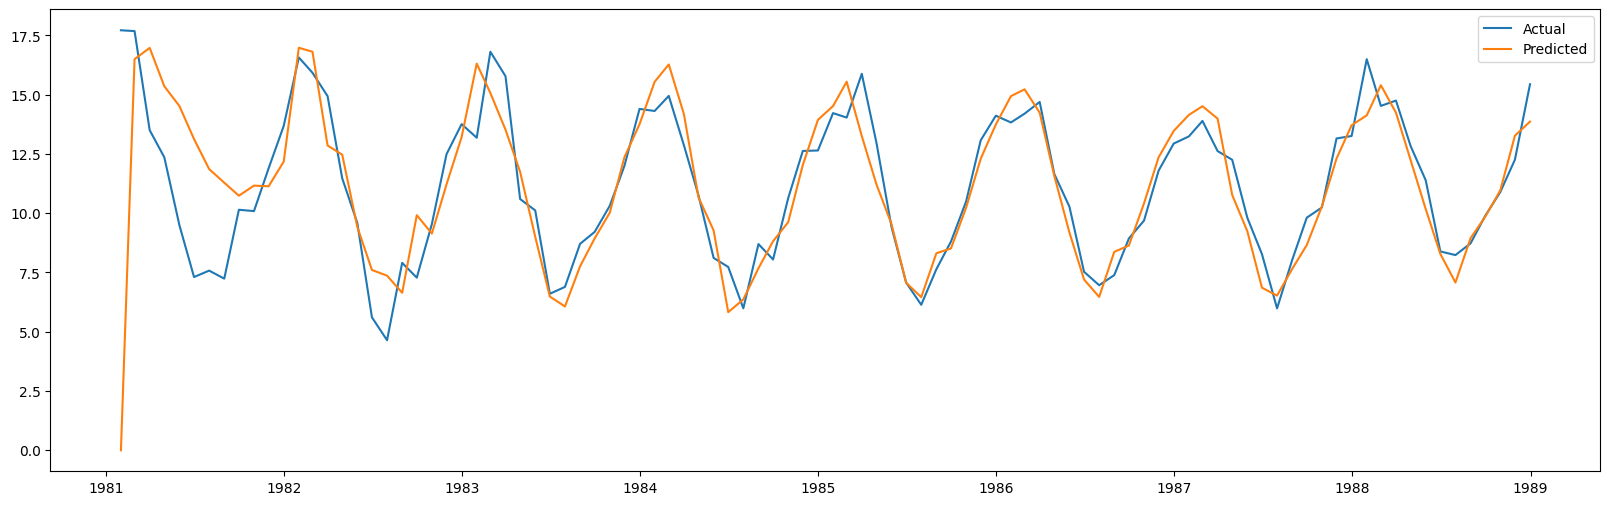

In [124]:
plt.figure(figsize=(20,6))
plt.plot(series_m_train,label='Actual')
plt.plot(predicted,label='Predicted')
plt.legend()

In [125]:
resid=series_m_train[1:]-predicted[1:]
mae=resid.abs().mean()
mae

1.1290348248254891

In [138]:
model.fit(series_m_train)
predicted=model.predict(n_periods=24)

/home/mdob/playground/ADDITIONAL/Various-tools-and-notes/vs_scripts3.12/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/mdob/playground/ADDITIONAL/Various-tools-and-notes/vs_scripts3.12/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


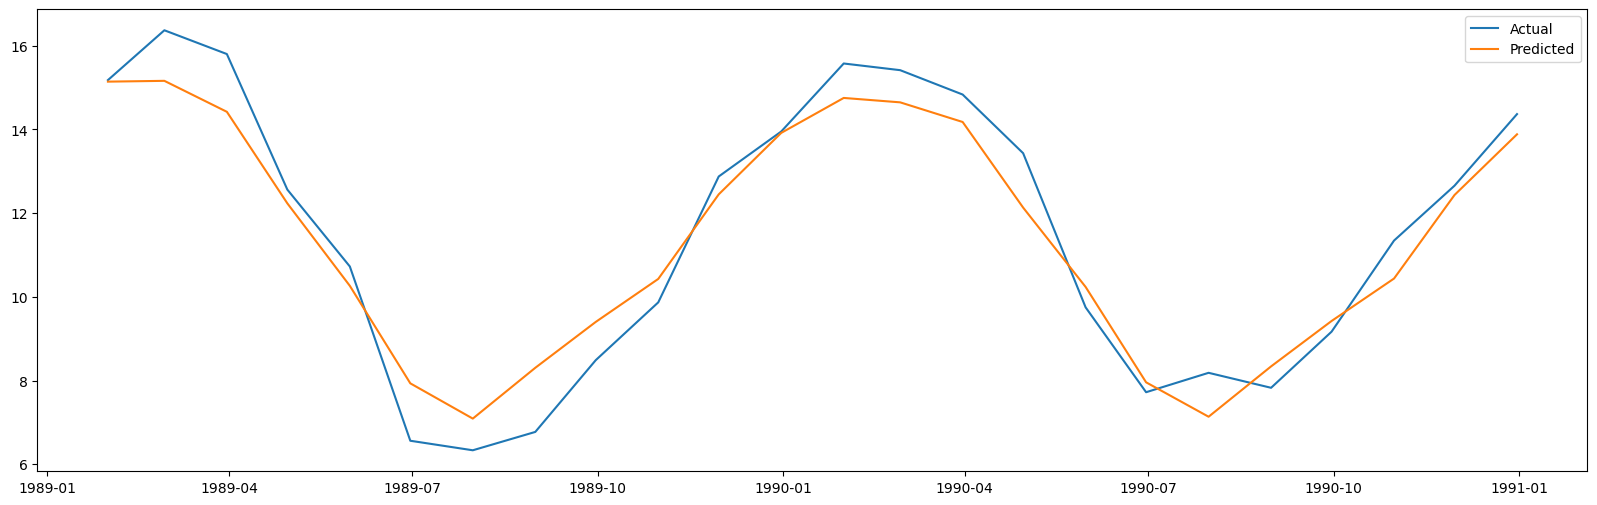

In [139]:
plt.figure(figsize=(20,6))
plt.plot(series_m_test,label='Actual')
plt.plot(predicted,label='Predicted')
plt.legend()

In [140]:
resid=series_m_test-predicted
mae=resid.abs().mean()
mae

0.6965652060489137

In [145]:
sarima=SARIMAX(series_m_train, order=(1,0,2),seasonal_order=(1,0,1,12))
sarima=sarima.fit()

/home/mdob/playground/ADDITIONAL/Various-tools-and-notes/vs_scripts3.12/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.89016D+00    |proj g|=  3.19548D+00

At iterate    5    f=  1.77566D+00    |proj g|=  1.11658D-01

At iterate   10    f=  1.72413D+00    |proj g|=  9.01332D-02

At iterate   15    f=  1.70333D+00    |proj g|=  2.18629D-02

At iterate   20    f=  1.69024D+00    |proj g|=  5.98526D-03

At iterate   25    f=  1.68971D+00    |proj g|=  5.87297D-04

At iterate   30    f=  1.68957D+00    |proj g|=  7.12428D-04

At iterate   35    f=  1.68957D+00    |proj g|=  4.10469D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function 

In [158]:
forecast = sarima.get_forecast(steps=24)

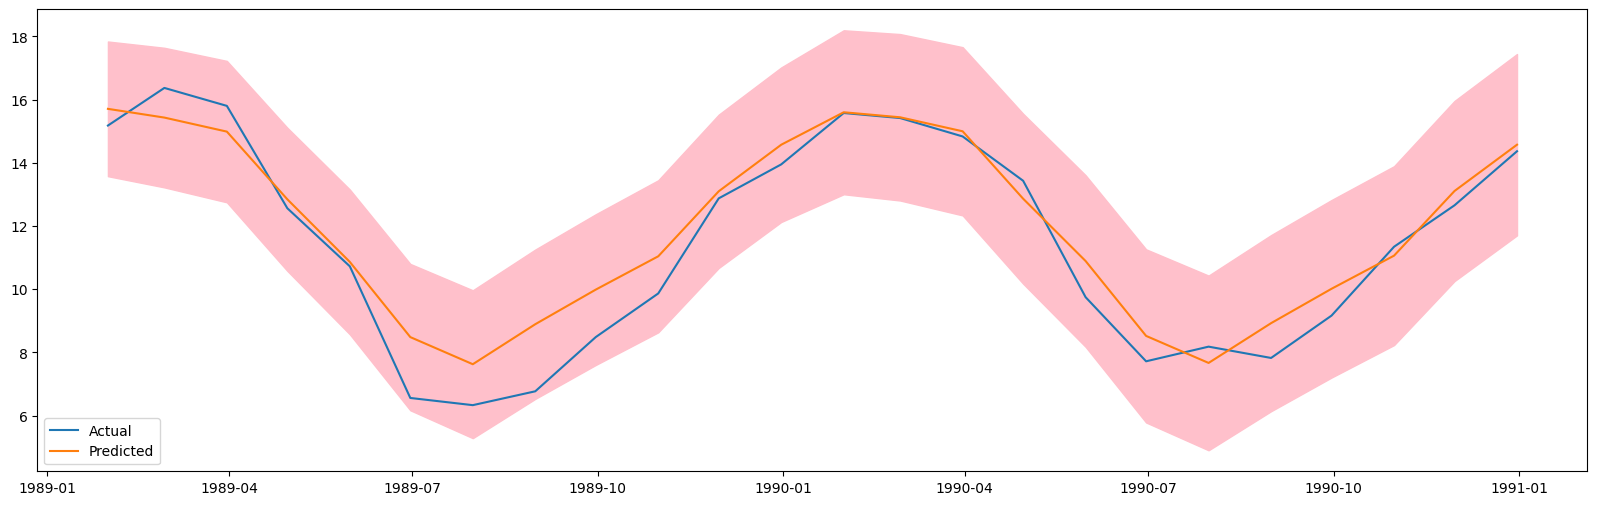

In [159]:
forecast_ci = forecast.conf_int()

plt.figure(figsize=(20,6))
plt.plot(series_m_test,label='Actual')
plt.plot(forecast.predicted_mean,label='Predicted')
plt.fill_between(forecast_ci.index, forecast_ci.iloc[:, 0], forecast_ci.iloc[:, 1], color='pink')
plt.legend()

In [160]:
resid=series_m_test-forecast.predicted_mean
mae=resid.abs().mean()
mae

0.7377754377583923